# This is a notebook showcasing Image procesing operations

In [1]:
from basic_functions import *
from plot_functions import *
import matplotlib.pyplot as plt

In [2]:
img_car = plt.imread('../img/car.jpg')

## Grayscale

Now I will convert the picture to Grayscale using different aproaches:
 - Lightness
 - Average
 - Luminosity
 

In [6]:
img_lum = grayscale_luminance(img_car)
img_light = grayscale_lightness(img_car)
img_avg = grayscale_average(img_car)

imgs = [img_car, img_lum, img_light, img_avg]
titles = ['Original Image', 'Grayscale Luminosity', 'Grayscale Lightness', 'Grayscale Average']

In [ ]:
def grayscale_luminance(img):
    """Convert RGB to grayscale using luminance method (vectorized)"""
    return np.dot(img[..., :3], [0.299, 0.587, 0.114]).astype(np.uint8)



def grayscale_average(img):
    """Convert RGB to grayscale using average method (vectorized)"""
    return np.mean(img, axis=2).astype(np.uint8)

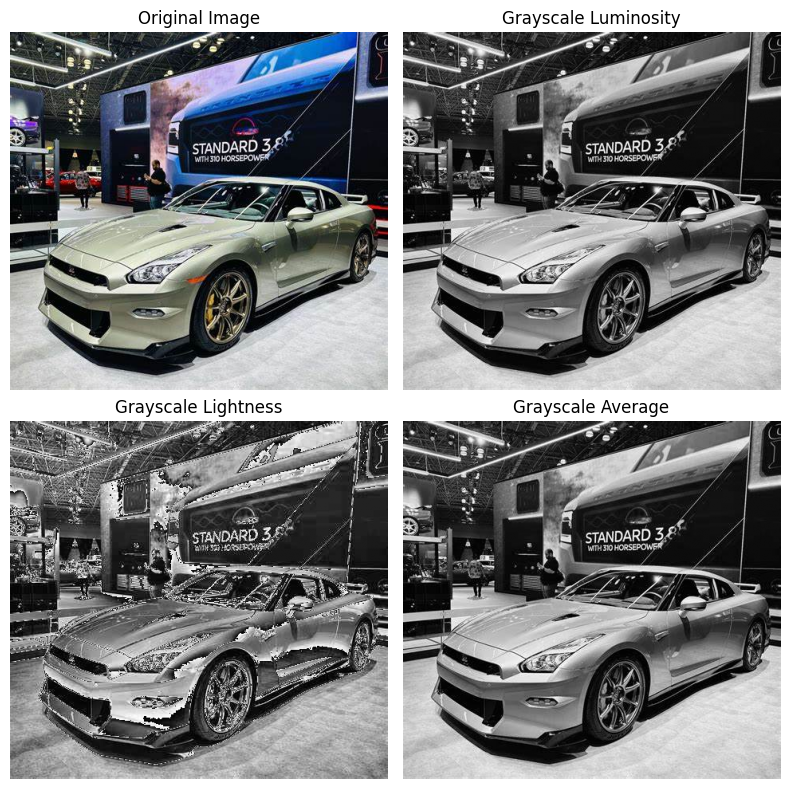

In [7]:
plot_images(imgs, titles)

## Brightness

In [12]:
new_min100 = brightness(img_car, -100)
new_50 = brightness(img_car, 50)
new_min50 = brightness(img_car, -50)
new_100 = brightness(img_car, 100)

In [11]:
def brightness(img, value):
    """Adjust brightness by adding value to all pixels"""
    return np.clip(img.astype(float) + value, 0, 255).astype(np.uint8)

def contrast(img, param):
    """Adjust contrast using the same formula but vectorized"""
    factor = (259 * (param + 255)) / (255 * (259 - param))
    return np.clip(factor * (img.astype(float) - 128) + 128, 0, 255).astype(np.uint8)

def inverse(img):
    """Invert image colors"""
    return 255 - img

In [13]:
imgs = [new_min100, new_min50,img_car, new_50, new_100]
titles = ['-100', '-50', 'original', '+50', '+100']

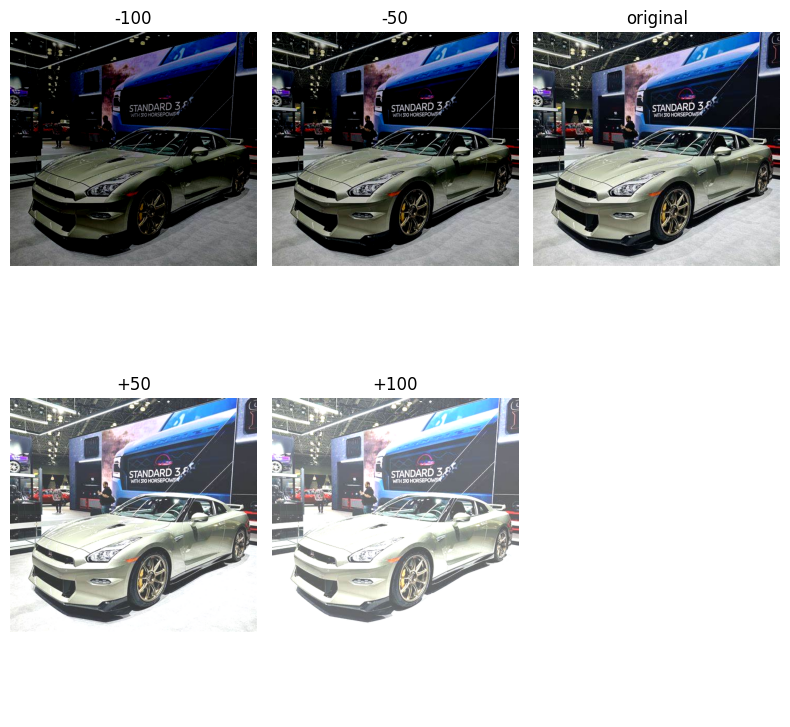

In [14]:
plot_images(imgs, titles)

## Contrast

In [15]:
new_min100 = contrast(img_car, -100)
new_50 = contrast(img_car, 50)
new_min50 = contrast(img_car, -50)
new_100 = contrast(img_car, 100)

In [16]:
imgs = [new_min100, new_min50,img_car, new_50, new_100]
titles = ['-100', '-50', 'original', '+50', '+100']

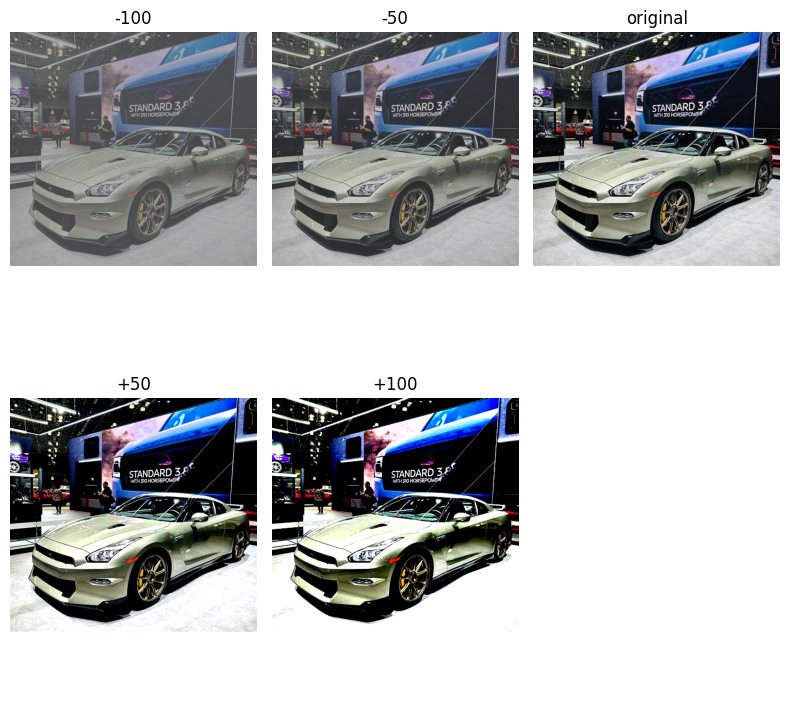

In [17]:
plot_images(imgs, titles)

## Negative inverse

In [10]:
img_neg_1 = plt.imread('../img/neg2.jpg')
img_neg_2 = plt.imread('../img/negative.gif')


In [11]:
inv_neg_1 = inverse(img_neg_1)
inv_neg_2 = inverse(img_neg_2)


In [12]:
imgs = [img_neg_1, img_neg_2, inv_neg_1,inv_neg_2]
titles = ['Negative 1', 'Negative 2', 'Inversed 1', 'Inversed 2']

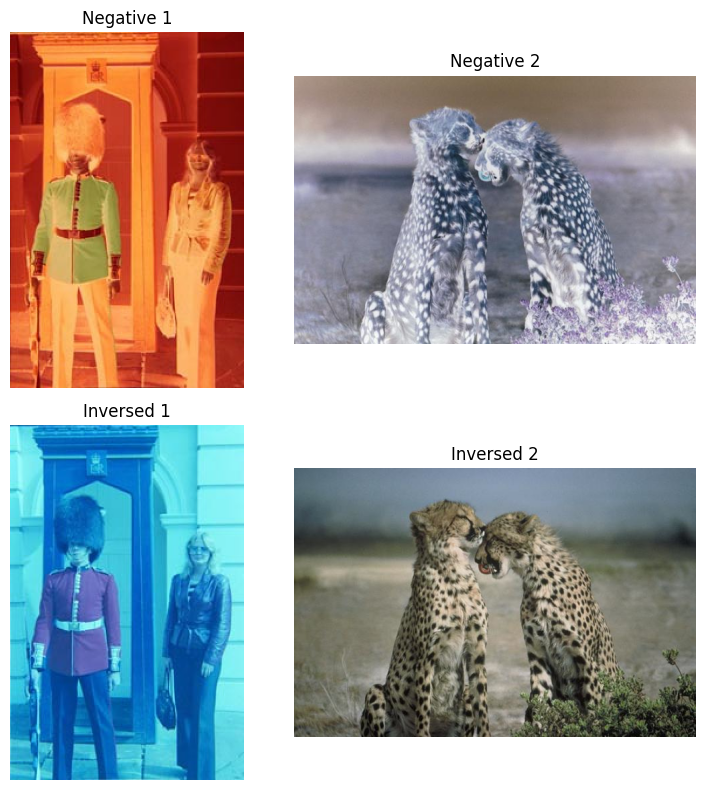

In [13]:
plot_images(imgs, titles)

## Binerazation

In [14]:
bin_50 = binarize(img_car, 50)
bin_100 = binarize(img_car, 100)
bin_150 = binarize(img_car, 150)

In [15]:
imgs = [img_car, bin_50, bin_100, bin_150]
titles = ['original', '50', '100', '150']

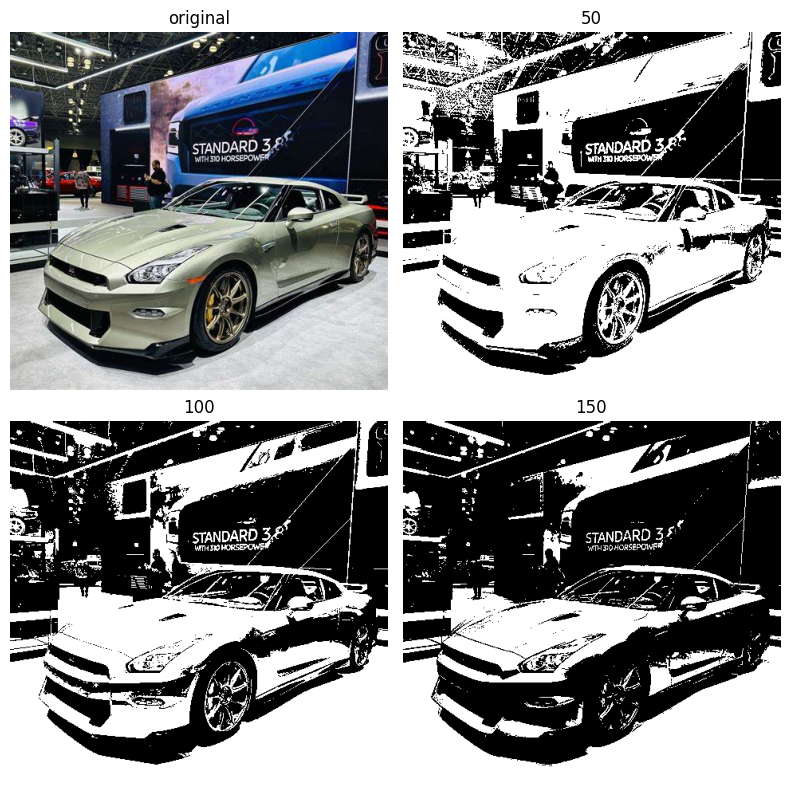

In [16]:
plot_images(imgs, titles)

In [5]:
def plot_rgb_histogram(img):
    colors = ['red', 'green', 'blue']
    
    plt.figure(figsize=(10, 6), facecolor='black')
    ax = plt.gca()
    ax.set_facecolor('#222222')  # Dark gray inside plot
    
    for i, color in enumerate(colors):
        hist, bins = np.histogram(img[..., i], bins=256, range=(0, 256))
        plt.fill_between(bins[:-1], hist, color=color, alpha=0.4)  # Filled area plot
    
    plt.title("RGB Histogram", fontsize=14, color='white')
    plt.xlabel("Pixel Intensity", fontsize=12, color='white')
    plt.ylabel("Frequency", fontsize=12, color='white')
    
    plt.xlim([0, 255])
    plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.3)  # Subtle grid
    plt.legend(["Red", "Green", "Blue"], fontsize=12, facecolor='#333333', edgecolor='white', loc="upper right")
    
    plt.tick_params(axis='both', colors='white')
    plt.show()

In [8]:
img_light

array([[ 21,  19,  23, ...,  12,   9,   9],
       [ 29,  31,  38, ...,  13,  11,  11],
       [ 29,  35,  48, ...,   6,   2,   2],
       ...,
       [202, 205, 202, ..., 191, 200, 200],
       [191, 197, 199, ..., 206, 198, 198],
       [190, 195, 197, ..., 204, 211, 201]], shape=(449, 474), dtype=uint8)

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def plot_histogram(img):
    plt.figure(figsize=(10, 6), facecolor='black')
    ax = plt.gca()
    ax.set_facecolor('#222222')

    if len(img.shape) == 2:  # Grayscale image
        hist, bins = np.histogram(img, bins=256, range=(0, 256))
        plt.fill_between(bins[:-1], hist, color='white', alpha=0.7)  # White fill for grayscale
        plt.title("Grayscale Histogram", fontsize=14, color='white')
        plt.legend(["Grayscale"], fontsize=12, facecolor='#333333', edgecolor='white', loc="upper right")
    else:  # RGB image
        colors = ['red', 'green', 'blue']
        for i, color in enumerate(colors):
            hist, bins = np.histogram(img[..., i], bins=256, range=(0, 256))
            plt.fill_between(bins[:-1], hist, color=color, alpha=0.5)
        plt.title("RGB Histogram", fontsize=14, color='white')
        plt.legend(["Red", "Green", "Blue"], fontsize=12, facecolor='#333333', edgecolor='white', loc="upper right")

    plt.xlabel("Pixel Intensity", fontsize=12, color='white')
    plt.ylabel("Frequency", fontsize=12, color='white')
    plt.xlim([0, 255])
    plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.3)
    plt.tick_params(axis='both', colors='white')

    plt.show()

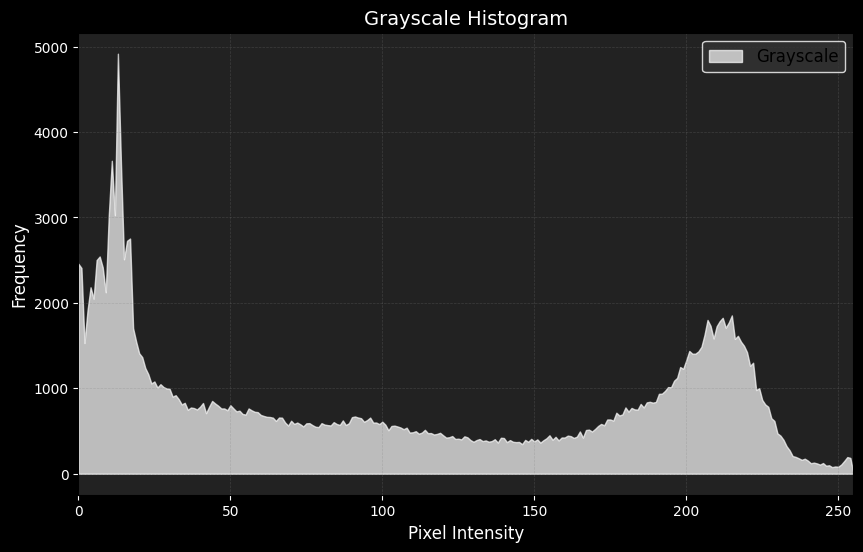

In [12]:
plot_histogram(img_lum)

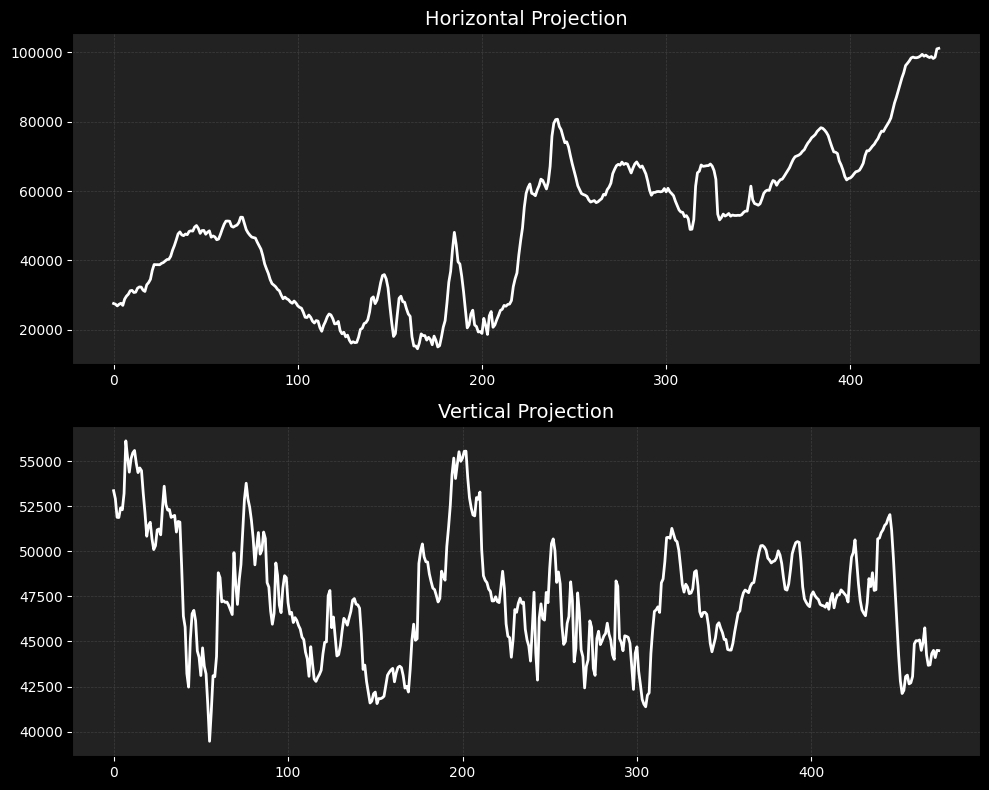

In [13]:
horizontal_projection = np.sum(img_lum, axis=1)  # Sum across rows
vertical_projection = np.sum(img_lum, axis=0)    # Sum across columns

# Plot projections
fig, axs = plt.subplots(2, 1, figsize=(10, 8), facecolor='black')

# Horizontal Projection
axs[0].plot(horizontal_projection, color='white', linewidth=2)
axs[0].set_title("Horizontal Projection", fontsize=14, color='white')
axs[0].set_facecolor('#222222')
axs[0].grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.3)
axs[0].tick_params(axis='both', colors='white')

# Vertical Projection
axs[1].plot(vertical_projection, color='white', linewidth=2)
axs[1].set_title("Vertical Projection", fontsize=14, color='white')
axs[1].set_facecolor('#222222')
axs[1].grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.3)
axs[1].tick_params(axis='both', colors='white')

plt.tight_layout()
plt.show()

In [26]:
def plot_image_with_projections(img):
    # Compute projections
    horizontal_projection = np.sum(img, axis=1)  # Sum across rows
    vertical_projection = np.sum(img, axis=0)    # Sum across columns

    # Create a figure with gridspec to control layout
    fig = plt.figure(figsize=(10, 10), facecolor='black')
    # Layout with horizontal projection on right
    grid = fig.add_gridspec(2, 2, width_ratios=[4, 1], height_ratios=[1, 4], wspace=0.05, hspace=0.05)
    
    # Main Image
    ax_img = fig.add_subplot(grid[1, 0])
    ax_img.imshow(img, cmap='gray', aspect='auto')
    ax_img.set_xticks([])
    ax_img.set_yticks([])

    # Horizontal Projection (Right side)
    ax_hor = fig.add_subplot(grid[1, 1], sharey=ax_img)
    # Plot the line (from left to right)
    ax_hor.plot(horizontal_projection, np.arange(len(horizontal_projection)), color='white', linewidth=1.5)
    # Fill below the line
    ax_hor.fill_betweenx(np.arange(len(horizontal_projection)), 0, horizontal_projection, color='white', alpha=0.3)
    ax_hor.set_xticks([])
    ax_hor.set_yticks([])
    ax_hor.set_facecolor('#222222')

    # Vertical Projection (Top)
    ax_ver = fig.add_subplot(grid[0, 0], sharex=ax_img)
    # Plot the line
    ax_ver.plot(np.arange(len(vertical_projection)), vertical_projection, color='white', linewidth=1.5)
    # Fill below the line
    ax_ver.fill_between(np.arange(len(vertical_projection)), 0, vertical_projection, color='white', alpha=0.3)
    ax_ver.set_xticks([])
    ax_ver.set_yticks([])
    ax_ver.set_facecolor('#222222')

    plt.show()

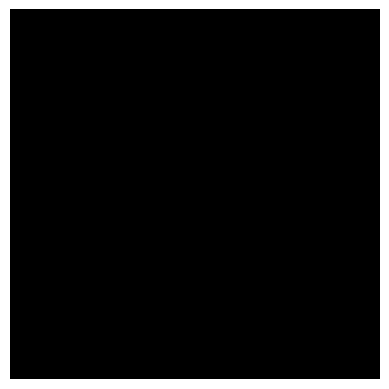

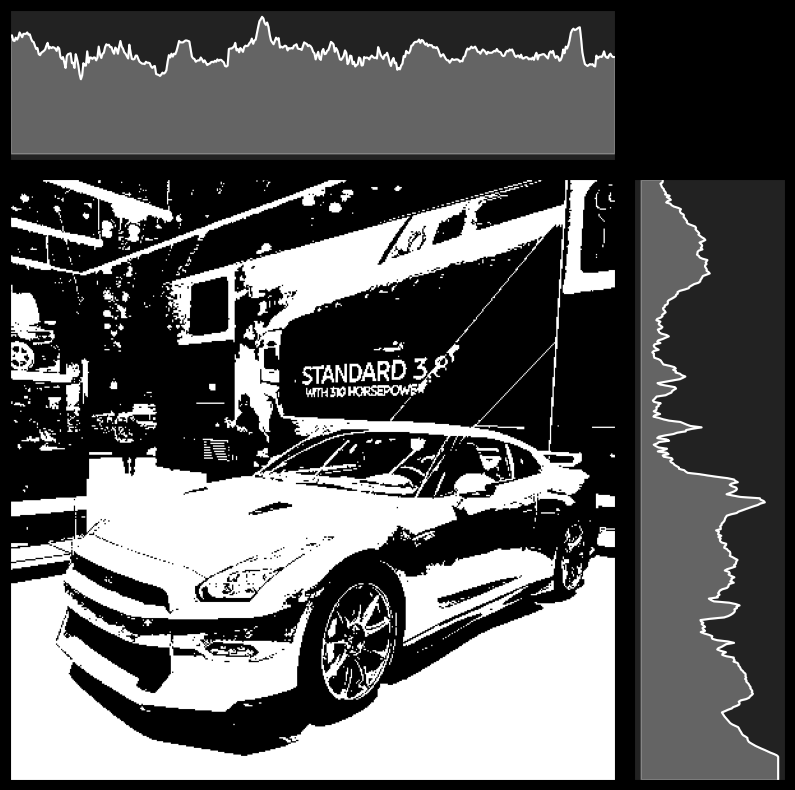

In [27]:
plot_image_with_projections(bin_100)

In [19]:
pip install opencv-python

   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
    --------------------------------------- 0.5/39.5 MB 5.6 MB/s eta 0:00:07
   ----- ---------------------------------- 5.8/39.5 MB 20.7 MB/s eta 0:00:02
   ---------- ----------------------------- 10.7/39.5 MB 24.8 MB/s eta 0:00:02
   ------------------ --------------------- 18.4/39.5 MB 26.9 MB/s eta 0:00:01
   ------------------------- -------------- 25.2/39.5 MB 28.5 MB/s eta 0:00:01
   --------------------------------- ------ 32.8/39.5 MB 29.7 MB/s eta 0:00:01
   ---------------------------------------  39.3/39.5 MB 30.5 MB/s eta 0:00:01
   ---------------------------------------- 39.5/39.5 MB 28.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
